# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [158]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics 




#to ignore warnings
import warnings
warnings.filterwarnings('ignore')


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [190]:
# load the train data
train_data = pd.read_csv('df_train.csv')
test_data = pd.read_csv('df_test.csv')

In [160]:
# Transpose index and columns in order to see all 49 cols, features will line up vertically while the index will horizontal 
train_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00,2015-01-01 18:00:00,2015-01-01 21:00:00,2015-01-02 00:00:00,2015-01-02 03:00:00,2015-01-02 06:00:00
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Valencia_wind_deg,level_5,level_10,level_9,level_8,level_7,level_7,level_8,level_9,level_9,level_9
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.333333
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0,69.666667,83.666667,83.666667,86.0,87.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0,67.333333,63.333333,64.0,63.333333,63.666667
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0,12.333333,16.333333,8.666667,5.333333,15.333333
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333,0.666667,1.0,1.333333,1.0,1.0


In [161]:
# We will need to confirm the cols and datatypes of these cols 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [162]:
# To see the total number of null values for each feature. And here we see the Valencia_pressure is the feature with the huge sum of null values.
train_data.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [163]:
# look at data statistics. This is the part where we need to do the Univariate Analysis(We will go for the non-graphical)
# Use the describe method to the descriptive statistics of each feature.
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


In [164]:
# To see the total number of null values for each feature. And here we see the Valencia_pressure is the feature with the huge sum of null values.
train_data.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

Valencia Pressure is the feature with missing values.

In [165]:
#Lets pull cols of type number
numeric_columns = train_data.select_dtypes(include='number')

#Check for missing values




In [166]:
numeric_columns.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
Madrid_wind_speed,0.666667,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Bilbao_rain_1h,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Valencia_wind_speed,0.666667,1.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.333333
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.000000,69.666667,83.666667,83.666667,86.000000,87.000000
Madrid_humidity,64.000000,64.666667,64.333333,56.333333,57.000000,67.333333,63.333333,64.000000,63.333333,63.666667
Bilbao_clouds_all,0.000000,0.000000,0.000000,0.000000,2.000000,12.333333,16.333333,8.666667,5.333333,15.333333
Bilbao_wind_speed,1.000000,1.000000,1.000000,1.000000,0.333333,0.666667,1.000000,1.333333,1.000000,1.000000
Seville_clouds_all,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bilbao_wind_deg,223.333333,221.000000,214.333333,199.666667,185.000000,191.333333,210.333333,238.666667,258.333333,255.333333


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Madrid_wind_speed'}>,
        <Axes: title={'center': 'Bilbao_rain_1h'}>,
        <Axes: title={'center': 'Valencia_wind_speed'}>,
        <Axes: title={'center': 'Seville_humidity'}>,
        <Axes: title={'center': 'Madrid_humidity'}>,
        <Axes: title={'center': 'Bilbao_clouds_all'}>],
       [<Axes: title={'center': 'Bilbao_wind_speed'}>,
        <Axes: title={'center': 'Seville_clouds_all'}>,
        <Axes: title={'center': 'Bilbao_wind_deg'}>,
        <Axes: title={'center': 'Barcelona_wind_speed'}>,
        <Axes: title={'center': 'Barcelona_wind_deg'}>,
        <Axes: title={'center': 'Madrid_clouds_all'}>,
        <Axes: title={'center': 'Seville_wind_speed'}>],
       [<Axes: title={'center': 'Barcelona_rain_1h'}>,
        <Axes: title={'center': 'Seville_rain_1h'}>,
        <Axes: title={'center': 'Bilbao_snow_3h'}>,
        <Axes: title={'center': 'Barcelona_pressure'}>,
        <Axes: titl

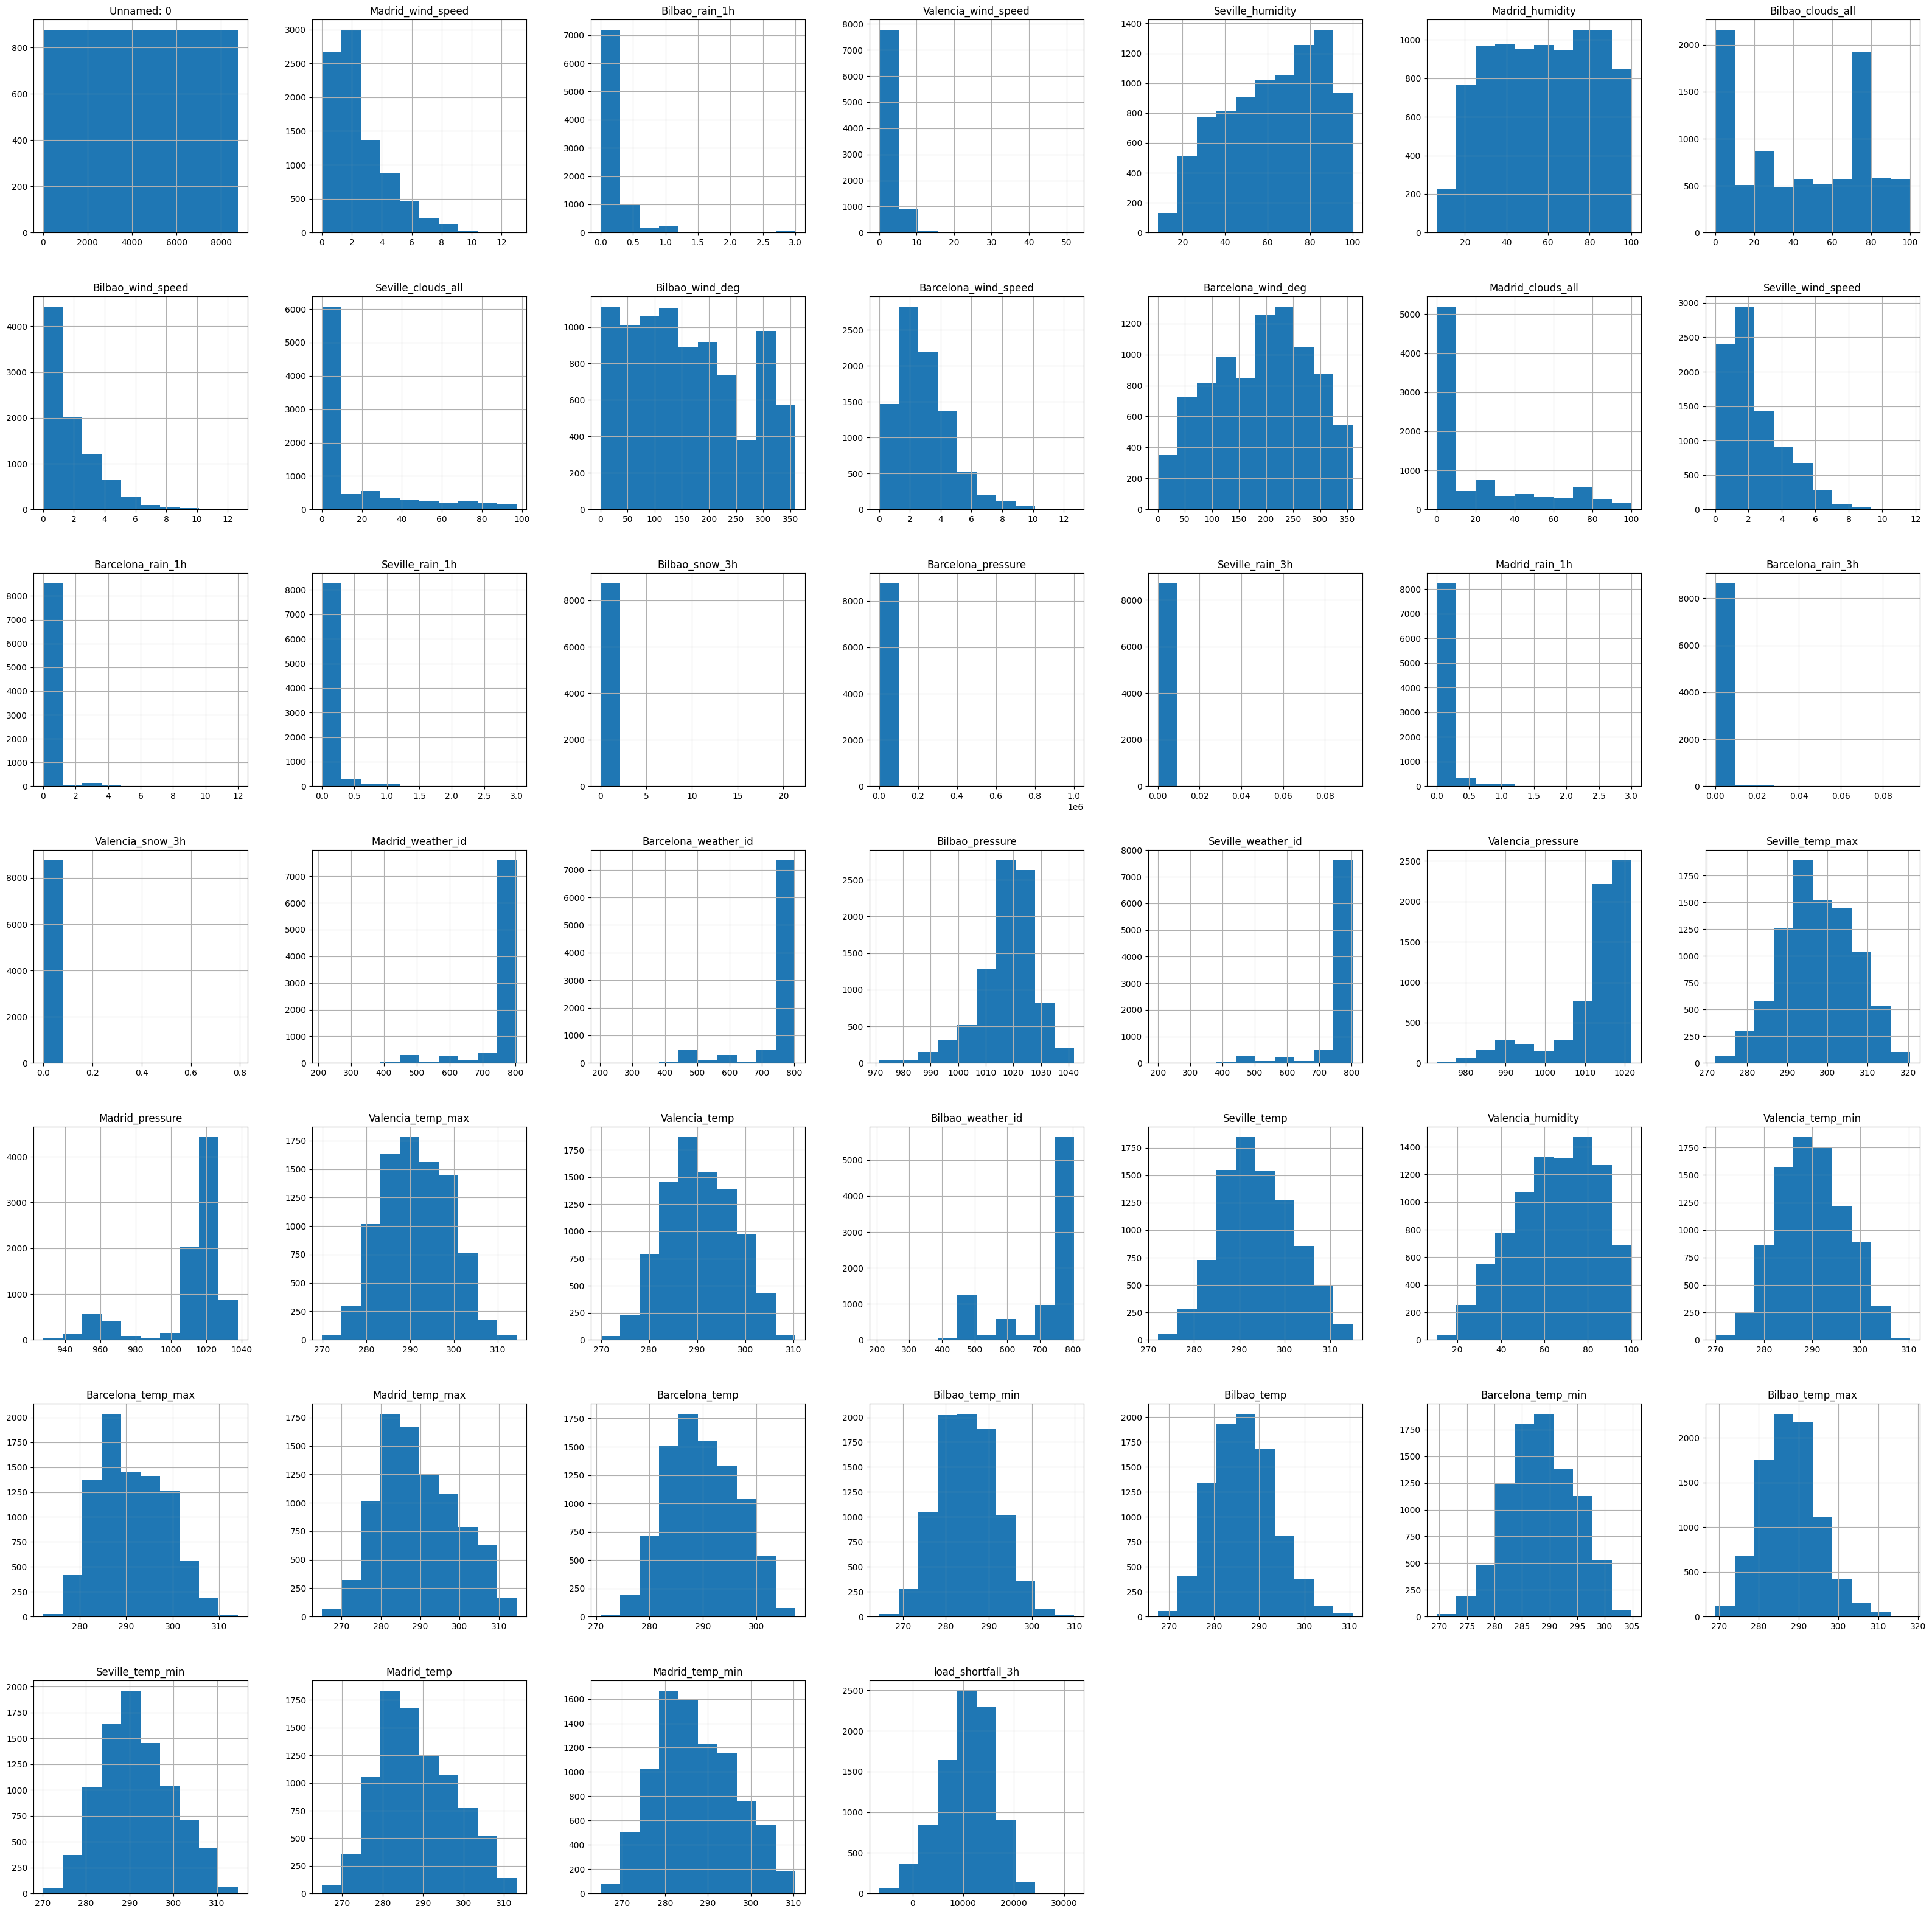

In [167]:
features = numeric_columns.columns
train_data[features].hist(figsize=(40,40))


In [168]:
numeric_columns.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

We can see we have some Features that are **Positive Skewness** such as : Madrid_wind_speed: 1.44 - Moderately positively skewed. Bilbao_rain_1h: 5.22 - Highly positively skewed.Valencia_wind_speed: 3.50 - Highly positively skewed. Seville_weather_id.
Also some **Negative Skewness**: Seville_humidity: -0.31 - Slightly negatively skewed. Madrid_humidity: -0.06 - Slightly negatively skewed.Bilbao_clouds_all: -0.05 - Slightly negatively skewed and others with negative values.

In [169]:
# Check for the outliers
numeric_columns.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

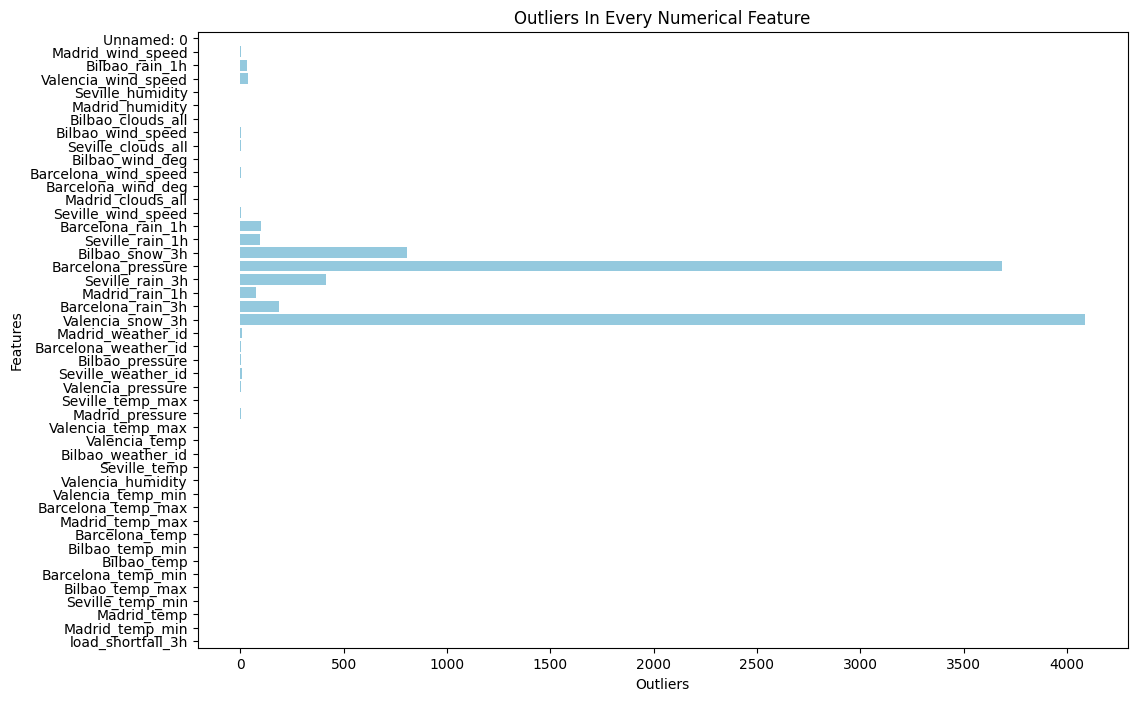

In [170]:
# We can then confirm the above with visualizing it.

skewness_values = numeric_columns.kurtosis()
plt.figure(figsize=(12, 8))
sns.barplot(x=skewness_values, y=skewness_values.index, color='skyblue')
plt.xlabel('Outliers')
plt.ylabel('Features')
plt.title('Outliers In Every Numerical Feature')
plt.show()

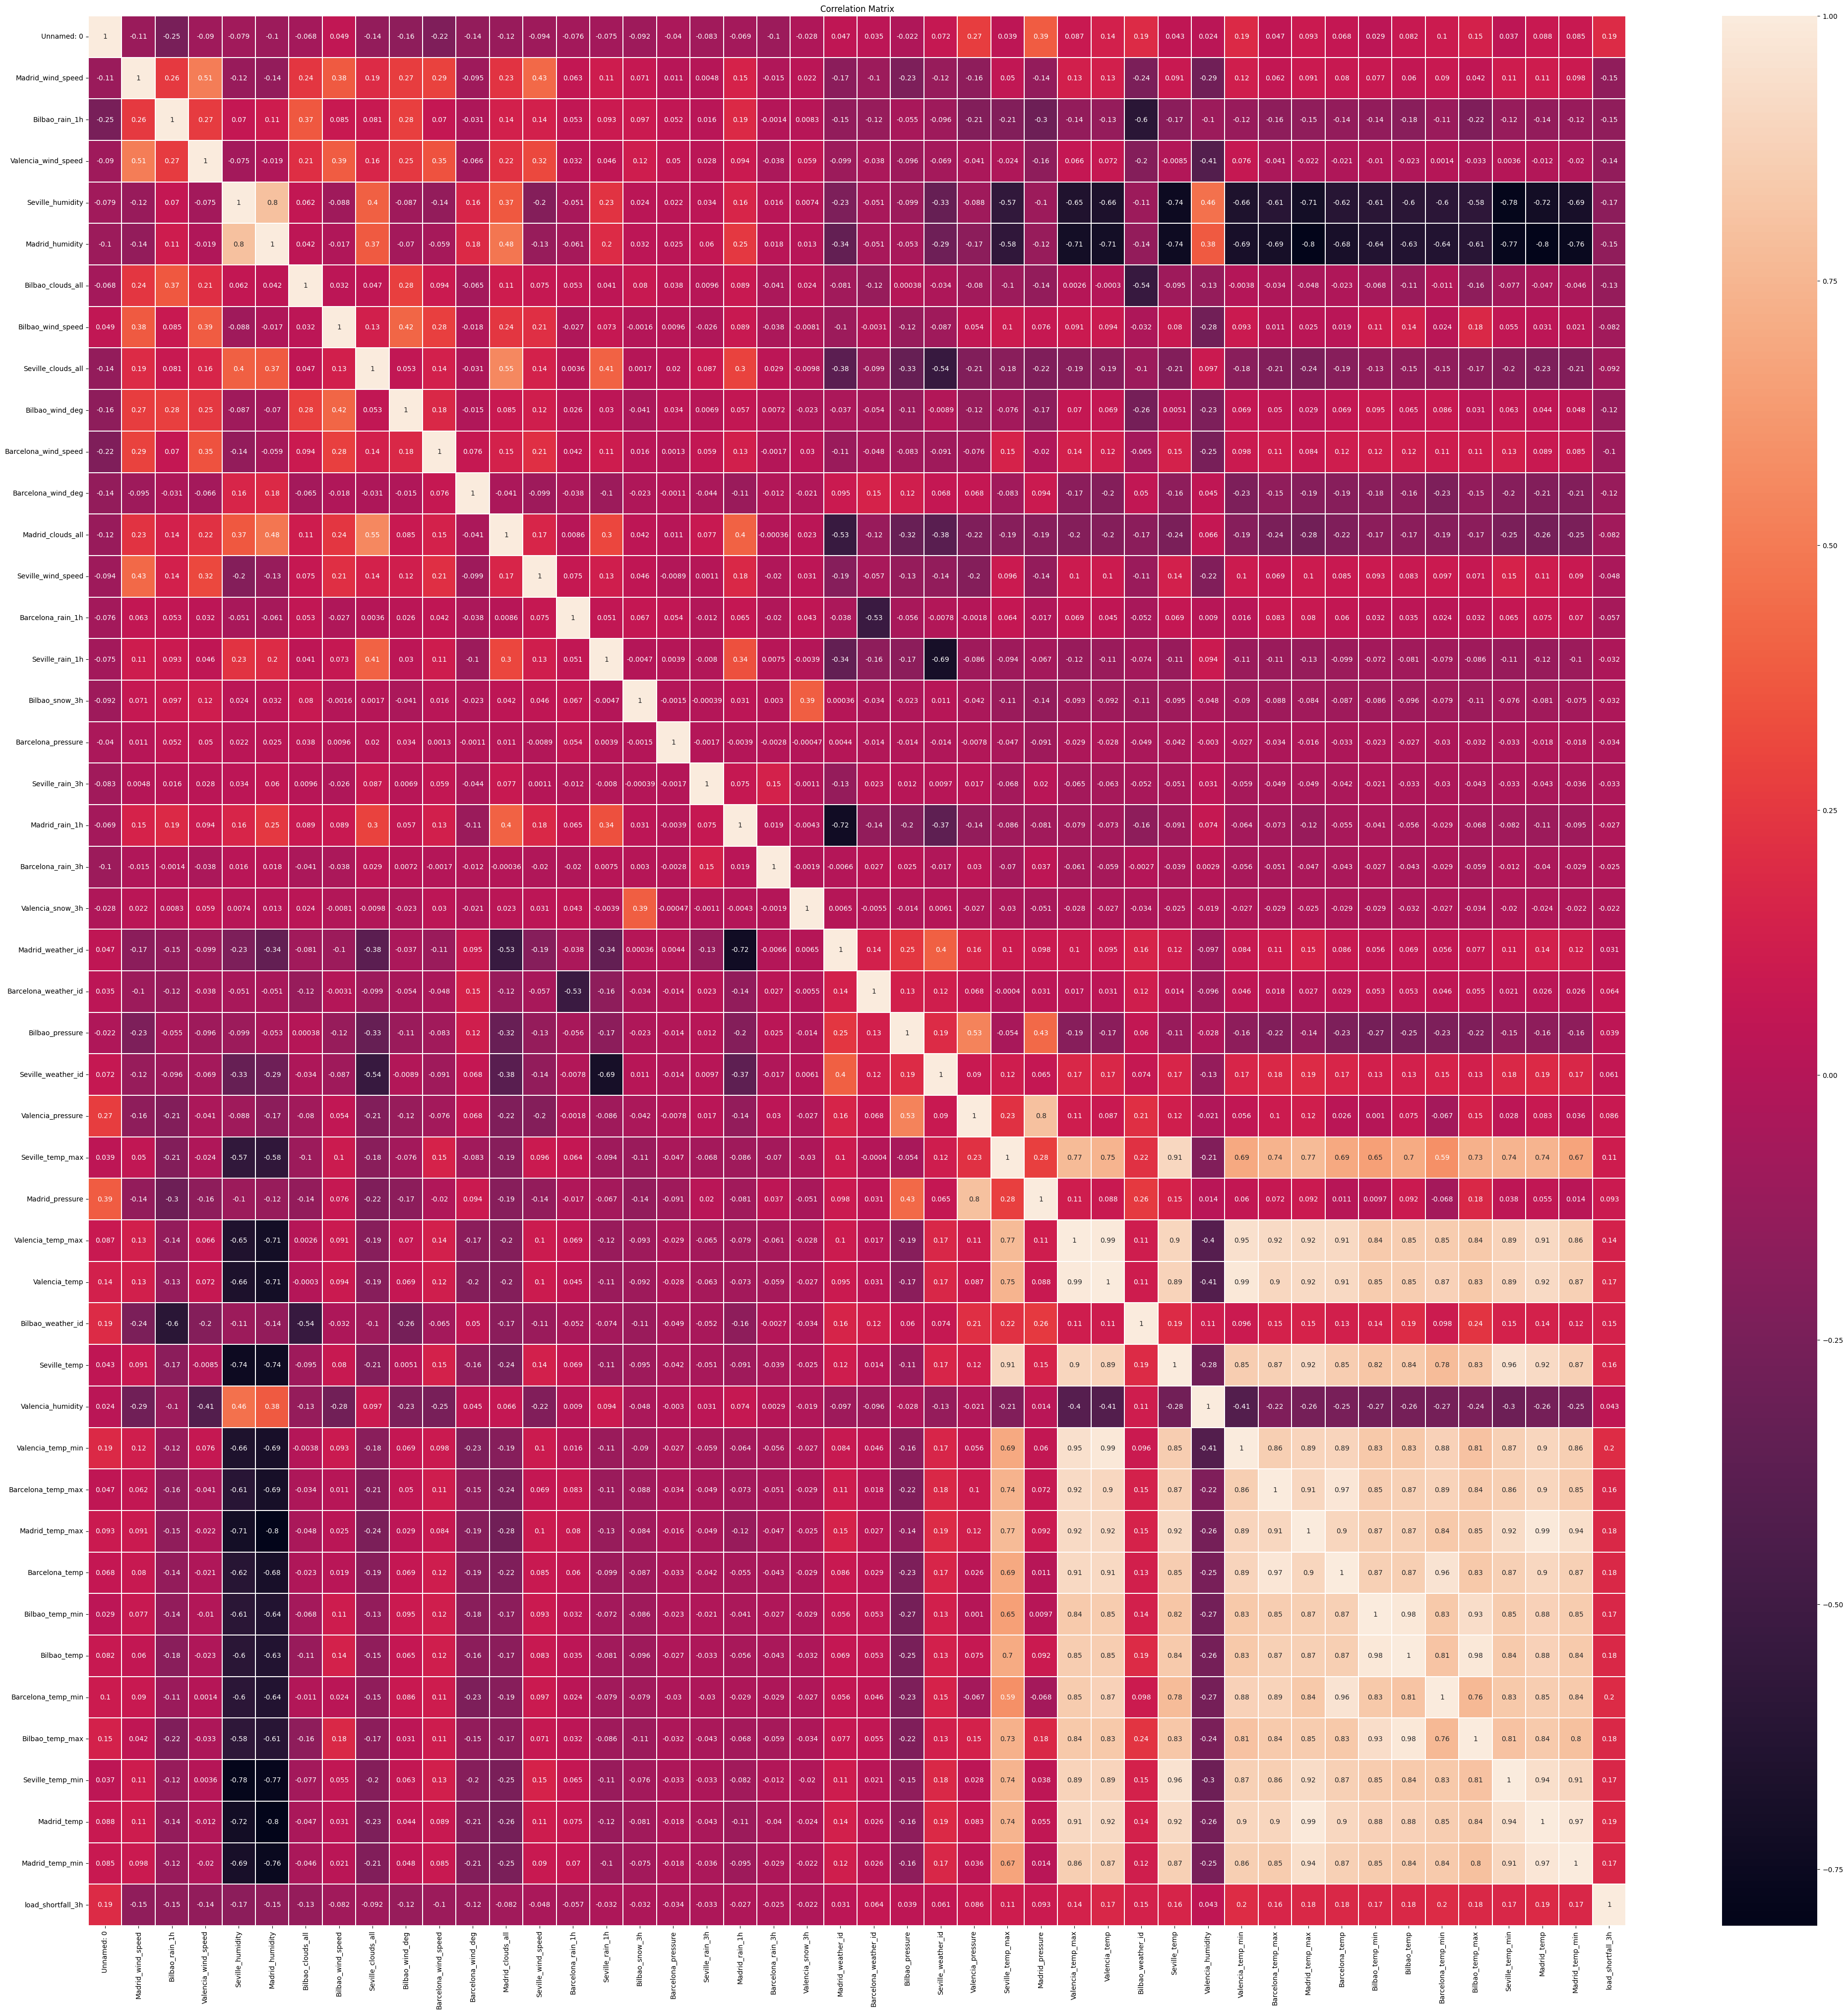

In [171]:
# Features that might have some correlation
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

Some of the features that indicate high-levels of outliers that is cols > 3 : Bilbao_rain_1h, Valencia_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Valencia_snow_3h, Barcelona_rain_3h, Madrid_weather_id, Barcelona_weather_id and Seville_weather_id.

In [172]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [173]:
# remove missing values/ featuresxcv
percent_missing = train_data['Valencia_pressure'].isnull().sum() * 100 / len(train_data)
print(percent_missing)

train_data.info()


23.599224010042224
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Se

Percentage is ~23% for Valencia so that means we can imputate the null values and also dropped the Unnamed column.

In [174]:
#Filling missing values
train_data['Valencia_pressure'].fillna(train_data['Valencia_pressure'].mean(), inplace = True)
train_data.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

In [175]:
#First we will start by Transforming the Valencia_wind_deg and Seville_pressure columns to numeric.

train_data['Valencia_wind_deg'] = train_data['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')
train_data['Seville_pressure'] = train_data['Seville_pressure'].str.extract('(\d+)').astype('int64')

In [176]:
# create new features
train_data['time'] = pd.to_datetime(train_data['time'])

train_data['year'] = train_data['time'].dt.year
train_data['month'] = train_data['time'].dt.month
train_data['day'] = train_data['time'].dt.day
train_data['hour'] = train_data['time'].dt.hour
train_data['minute'] = train_data['time'].dt.minute

# Display the updated DataFrame
print(train_data.head())

   Unnamed: 0                time  Madrid_wind_speed  Valencia_wind_deg  \
0           0 2015-01-01 03:00:00           0.666667                  5   
1           1 2015-01-01 06:00:00           0.333333                 10   
2           2 2015-01-01 09:00:00           1.000000                  9   
3           3 2015-01-01 12:00:00           1.000000                  8   
4           4 2015-01-01 15:00:00           1.000000                  7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Bilbao_temp_max  \
0                0.0 

In [192]:
# engineer existing features
submissions = train_data[['time']]
train_data = train_data.drop(['time'],axis =1 )
train_data.head(10).T



,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Valencia_wind_deg,level_5,level_10,level_9,level_8,level_7,level_7,level_8,level_9,level_9,level_9
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.333333
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0,69.666667,83.666667,83.666667,86.0,87.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0,67.333333,63.333333,64.0,63.333333,63.666667
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0,12.333333,16.333333,8.666667,5.333333,15.333333
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333,0.666667,1.0,1.333333,1.0,1.0
Seville_clouds_all,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [178]:
# create targets and features dataset
X = train_data.drop(['load_shortfall_3h'], axis=1)  # Adjust features as needed
y = train_data['load_shortfall_3h']




In [179]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7010, 52)
X_test shape: (1753, 52)
y_train shape: (7010,)
y_test shape: (1753,)


In [180]:
# First model to be employed is the Linear Regressor
model = LinearRegression()

model.fit(X_train, y_train)
predict = model.predict(X_test)
Linear = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
print(Linear.head())

            Actual     Predicted
1226  11450.666667  12060.213186
7903  13693.333333  11722.590583
1559  18337.333333   9725.620060
3621  -1221.000000   9274.862218
7552   8515.000000  14373.881318


In [181]:
#Our second model will be the `Random Forrest Regressor`
model_rf = RandomForestRegressor(random_state=42)

model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)
Random_Forrest = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_rf})
print(Random_Forrest.head())

            Actual     Predicted
1226  11450.666667   8341.483333
7903  13693.333333  12319.320000
1559  18337.333333  15600.190000
3621  -1221.000000   2219.091667
7552   8515.000000   9452.400000


In [182]:
#Our third model will be the `Decision Tree Regressor`
Reg_tree = DecisionTreeRegressor(random_state=42)

Reg_tree.fit(X_train,y_train)
Tree_pred = Reg_tree.predict(X_test)
DecisionTree = pd.DataFrame({'Actual': y_test, 'Predicted': Tree_pred})
print(DecisionTree.head())



            Actual     Predicted
1226  11450.666667  11836.000000
7903  13693.333333  11841.666667
1559  18337.333333  16259.666667
3621  -1221.000000   -845.000000
7552   8515.000000  10368.666667


In [183]:
#
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,predictions_rf))}
                        
                    }


Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

,Test RMSE
Decision Tree,4141.601814
Linear model,4802.711862
Random Forest,2993.237675


In [184]:

Model_Performance2 = { 
    
                      'Test MSE':
                    
                        {"Linear model": (metrics.mean_squared_error(y_test,predict)),
                        "Decision Tree" : (metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_squared_error(y_test,predictions_rf))}
                        
                    }


Model_Performance2 = pd.DataFrame(data=Model_Performance2)
Model_Performance2

,Test MSE
Decision Tree,1.715287e+07
Linear model,2.306604e+07
Random Forest,8.959472e+06


In [185]:
models = ['Decision Tree', 'Linear Model', 'Random Forest']
r2_scores = [0.281367, 0.175709, 0.631744]
Model_Performance3 = { 
    
                      'Test MAE':
                    
                        {"Linear model": (metrics.mean_absolute_error(y_test,predict)),
                        "Decision Tree" : (metrics.mean_absolute_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_absolute_error(y_test,predictions_rf))}
                        
                    }


Model_Performance3 = pd.DataFrame(data=Model_Performance3)
Model_Performance3

,Test MAE
Decision Tree,3061.821687
Linear model,3823.732463
Random Forest,2341.073864


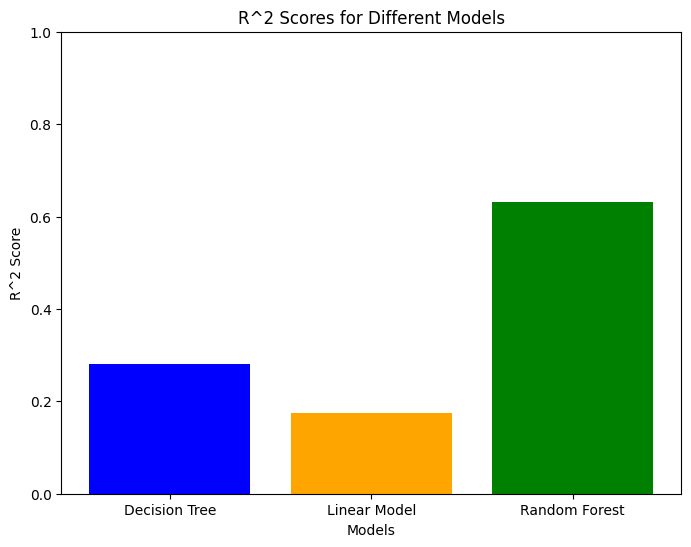

In [186]:
plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, color=['blue', 'orange', 'green'])
plt.title('R^2 Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Set y-axis limit to better visualize differences
plt.show()

In [187]:
Model_Performance4 = { 
    
                      'Test R^2':
                    
                        {"Linear model": (metrics.r2_score(y_test,predict)),
                        "Decision Tree" : (metrics.r2_score(y_test,Tree_pred)),
                        "Random Forest" : (metrics.r2_score(y_test,predictions_rf))}
                        
                    }


Model_Performance4 = pd.DataFrame(data=Model_Performance4)
Model_Performance4
Model_Performance4.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Decision Tree to Random Forest
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test R^2  3 non-null      float64
dtypes: float64(1)
memory usage: 48.0+ bytes


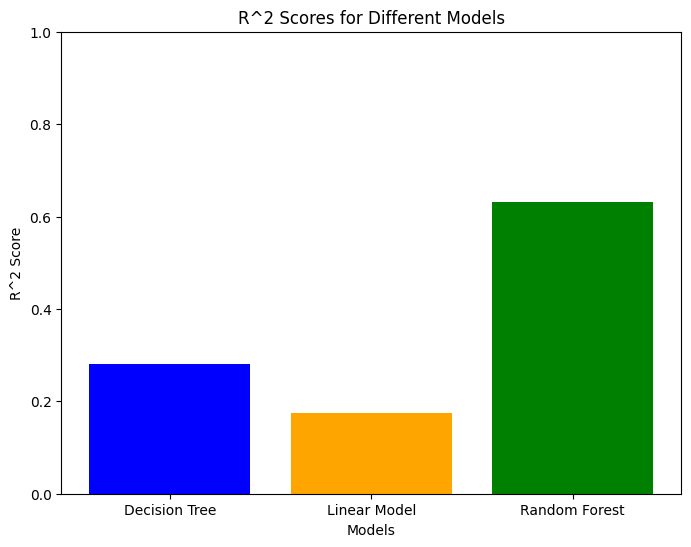

In [188]:
models = ['Decision Tree', 'Linear Model', 'Random Forest']
r2_scores = [0.281367, 0.175709, 0.631744]

plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, color=['blue', 'orange', 'green'])
plt.title('R^2 Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Set y-axis limit to better visualize differences
plt.show()


In [195]:
daf = pd.DataFrame(predictions_rf, columns = ['load_shortfall_3h'])
daf

,load_shortfall_3h
0,8341.483333
1,12319.320000
2,15600.190000
3,2219.091667
4,9452.400000
...,...
1748,5393.816667
1749,6052.243333
1750,12676.933333
1751,9058.136667


In [196]:
output = pd.DataFrame({"time":test_data['time']})
submissions = output.join(daf)
submissions.to_csv('submissions_load_shortfall_3h.csv', index=None)


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance


In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic